In [ ]:
pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Adding libraries

In [65]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import sklearn
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_samples , silhouette_score
from sklearn.mixture import GaussianMixture
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')

# Features Extraction

In [ ]:
header = 'voice_id chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate chroma_cqt chroma_cens melspectrogram spectral_contrast spectral_flatness poly_features tonnetz tempogram'
for i in range(1, 21):
    header += f' mfcc{i}'
# header += ' label'
header = header.split()

In [2]:
file = open('voice_data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

for filename in os.listdir(f'./drive/MyDrive/Voice'):
    songname = f'./drive/MyDrive/Voice/{filename}'
    y0, sr0 = librosa.load(songname, mono=True, duration=30)
    rmse = librosa.feature.rms(y=y0)
    chroma_stft = librosa.feature.chroma_stft(y=y0, sr=sr0)
    spec_cent = librosa.feature.spectral_centroid(y=y0, sr=sr0)
    spec_bw = librosa.feature.spectral_bandwidth(y=y0, sr=sr0)
    rolloff = librosa.feature.spectral_rolloff(y=y0, sr=sr0)
    zcr = librosa.feature.zero_crossing_rate(y0)
    mfcc = librosa.feature.mfcc(y=y0, sr=sr0)

    chroma_cqt = librosa.feature.chroma_cqt(y0, sr0)
    chroma_cens= librosa.feature.chroma_cens(y0, sr0)
    melspectrogram = librosa.feature.melspectrogram(y0, sr0)
    spectral_contrast = librosa.feature.spectral_contrast(y0, sr0)
    spectral_flatness = librosa.feature.spectral_flatness(y0)
    poly_features = librosa.feature.poly_features(y0, sr0)
    tonnetz = librosa.feature.tonnetz(y0, sr0)
    tempogram = librosa.feature.tempogram(y0, sr0)

    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(chroma_cqt)} {np.mean(chroma_cens)} {np.mean(melspectrogram)} {np.mean(spectral_contrast)} {np.mean(spectral_flatness)} {np.mean(poly_features)} {np.mean(tonnetz)} {np.mean(tempogram)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'

    file = open('voice_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

NameError: ignored

In [ ]:
data = pd.read_csv('voice_data.csv')
data.head()

,voice_id,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,chroma_cqt,chroma_cens,melspectrogram,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,9098.wav,0.369225,0.046809,2329.631156,2413.742289,4677.578382,0.118935,0.471864,0.255715,1.097072,...,-4.279749,-2.955371,-14.975864,-1.616190,-14.069487,-11.404274,-4.779163,-1.832093,-7.576603,-0.053098
1,9099.wav,0.299051,0.040595,2258.563870,2382.174317,4477.544956,0.106513,0.385992,0.242461,0.685992,...,-6.351195,-2.557911,-19.613825,2.119483,-12.453156,-10.023938,-8.362415,-10.538032,-11.865811,-6.683540
2,910.wav,0.331110,0.027311,1028.599356,1480.443570,1579.451696,0.049447,0.481442,0.250515,0.556088,...,-12.246968,-0.775021,-3.362810,-1.890957,-7.215577,-6.722055,-3.312130,-4.797468,-6.621109,-4.245042
3,9100.wav,0.426910,0.011069,2268.909634,2696.274514,5271.647135,0.091634,0.516939,0.259575,0.085343,...,-2.108526,-4.852947,-7.655149,-1.295465,-1.209666,-8.413820,-4.589447,-0.622646,-7.065890,-4.207686
4,9101.wav,0.396582,0.018276,2322.139883,2653.398293,5161.143494,0.105826,0.484442,0.266281,0.259790,...,-2.383848,-1.810102,-9.272352,1.016275,-6.315449,-6.734708,-6.128237,-3.306725,-9.255294,-5.576177


In [ ]:
voice_data = data.copy()

In [ ]:
voice_data

,voice_id,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,9098.wav,0.369225,0.046809,2329.631156,2413.742289,4677.578382,0.118935,-394.132568,65.614784,-0.230034,...,-4.279749,-2.955371,-14.975864,-1.616190,-14.069487,-11.404274,-4.779163,-1.832093,-7.576603,-0.053098
1,9099.wav,0.299051,0.040595,2258.563870,2382.174317,4477.544956,0.106513,-396.777618,77.251091,-1.967858,...,-6.351195,-2.557911,-19.613825,2.119483,-12.453156,-10.023938,-8.362415,-10.538032,-11.865811,-6.683540
2,910.wav,0.331110,0.027311,1028.599356,1480.443570,1579.451696,0.049447,-478.123016,82.608612,28.429359,...,-12.246968,-0.775021,-3.362810,-1.890957,-7.215577,-6.722055,-3.312130,-4.797468,-6.621109,-4.245042
3,9100.wav,0.426910,0.011069,2268.909634,2696.274514,5271.647135,0.091634,-533.723877,80.416367,27.698174,...,-2.108526,-4.852947,-7.655149,-1.295465,-1.209666,-8.413820,-4.589447,-0.622646,-7.065890,-4.207686
4,9101.wav,0.396582,0.018276,2322.139883,2653.398293,5161.143494,0.105826,-480.691223,67.928398,16.232029,...,-2.383848,-1.810102,-9.272352,1.016275,-6.315449,-6.734708,-6.128237,-3.306725,-9.255294,-5.576177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17152,10133.wav,0.478692,0.010991,2489.603144,2628.635417,5508.592122,0.093504,-511.605042,79.787819,4.267603,...,-7.007113,-7.512403,-2.192831,-2.388432,-5.209917,-1.365139,2.967421,-2.625137,-2.875969,0.977614
17153,10134.wav,0.522729,0.001647,2777.438580,2724.238810,5861.978067,0.151424,-584.935242,79.813919,2.997258,...,-6.767550,-5.978239,-6.760041,1.310687,-2.112568,0.360371,-3.152431,3.084905,-2.559720,-0.938877
17154,10135.wav,0.544817,0.001796,2976.025620,2734.382038,6098.184877,0.165784,-582.691650,75.094643,1.962689,...,-4.628536,-3.738466,-6.230413,2.142874,-3.748199,-0.843720,-2.507499,1.971909,-3.428669,0.429608
17155,10136.wav,0.333702,0.027438,2071.605228,1999.756761,4059.099265,0.113778,-478.583740,61.517368,8.281408,...,-11.922956,-2.463714,-5.218111,4.417655,-7.259745,-3.796586,-3.793378,-3.989266,-0.170906,-3.959145


# Data Preprocessing

In [ ]:
for i in range (0,17157 ):
  voice_data['voice_id'][i] = voice_data['voice_id'][i].replace('.wav', '')

In [ ]:
voice_data['voice_id']=voice_data['voice_id'].astype(str).astype(int)

In [ ]:
voice_data=voice_data.sort_values('voice_id')

In [ ]:
dataV2  = pd.read_csv("/content/drive/MyDrive/DataSets/dataV2.csv")
dataV2

,emotionID,textID,sex,age,voice id
0,1,1,m,21,15997
1,1,2,m,21,16001
2,1,3,m,21,16005
3,1,4,m,21,16009
4,1,5,m,21,16013
...,...,...,...,...,...
16860,4,6,f,54,10563
16861,4,7,f,54,10567
16862,4,8,f,54,10571
16863,4,9,f,54,10575


In [ ]:
same_id = []
for i in range(0,16865):
  for j in range(i,16865):
    if (dataV2['voice id'][i] == dataV2['voice id'][j]) & (i != j) :
      same_id.append(i)

# same_id
dataV2.drop(same_id , axis=0, inplace=True)

In [ ]:
dataV2 = dataV2.rename({'voice id': 'voiceId'}, axis=1)

In [ ]:
datav2=dataV2.sort_values('voiceId')
datav2

,emotionID,textID,sex,age,voiceId
12946,1,10,f,33,0
12947,2,10,f,33,1
12948,3,10,f,33,2
12949,4,10,f,33,3
12910,1,1,f,33,4
...,...,...,...,...,...
3624,4,8,f,24,17138
3595,1,9,f,24,17139
3605,2,9,f,24,17140
3615,3,9,f,24,17141


In [ ]:
for j in voice_data['voice_id'] :
  if not ((datav2.voiceId == j).any()) : 
    voice_data.drop(voice_data[voice_data['voice_id']== j].index, axis=0, inplace=True)

In [ ]:
for j in datav2['voiceId'] :
  if not ((voice_data.voice_id == j).any()) : 
    datav2.drop(datav2[datav2['voiceId']== j].index, axis=0, inplace=True)

In [ ]:
for j in datav2['voiceId'] :
  if datav2['voiceId'].value_counts()[j] > 1 :
    for i in range(datav2['voiceId'].value_counts()[j]-1) :
       datav2.drop(datav2[datav2['voiceId']== j].index[i], axis=0, inplace=True)

In [ ]:
voice_data.reset_index(inplace=True)
voice_data=voice_data.drop(['index'],axis=1)
voice_data

,voice_id,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0,0.407195,0.048227,2070.117934,2235.978511,4056.818972,0.097052,-336.662201,99.368729,-0.322146,...,-4.794734,-15.250732,-1.424494,2.783118,-2.356746,-2.504868,-6.397053,-2.271737,-6.038849,2.307027
1,1,0.372574,0.030952,2035.473598,2105.395420,3961.978075,0.092654,-417.724609,101.465805,24.462284,...,-3.422605,-4.797619,-12.757881,-0.092873,3.225427,-3.593542,-0.112227,-2.448969,1.081102,2.982710
2,2,0.396723,0.013850,2302.454308,2401.883596,4745.061271,0.091519,-485.174652,86.329292,25.265568,...,3.602045,2.213439,-3.381242,7.795971,0.320674,0.389995,-2.094615,4.497597,-3.786969,-0.991609
3,3,0.327613,0.019407,1867.121123,2006.126588,3371.484375,0.093968,-442.173676,119.323441,12.196169,...,-3.617050,-4.838505,-10.580754,-1.082697,0.066405,-8.977236,-4.589973,2.556240,-11.811107,0.796560
4,4,0.289442,0.092171,2504.532543,1934.266426,3640.933368,0.154567,-290.744873,102.824020,10.513094,...,-10.236624,-6.066375,-4.731117,-0.813028,-4.293788,-3.371527,-2.857820,-1.253108,-4.223165,7.088153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,17138,0.386891,0.084560,2272.658876,2612.279871,5136.615460,0.074675,-254.435379,88.571175,12.887927,...,-2.168603,5.087998,1.316096,7.020123,-2.614000,-0.416007,-6.005363,7.160671,-4.315312,3.270334
16780,17139,0.430422,0.048875,2206.421625,2439.838558,4751.570435,0.078739,-357.782227,92.558861,-11.696466,...,-3.704274,4.807886,-1.939340,7.666349,-8.393369,-2.534504,-4.853053,9.299892,2.404159,8.027781
16781,17140,0.374754,0.077368,2407.139777,2452.604153,4796.014874,0.108536,-296.014099,81.470718,-15.767801,...,-10.895553,-1.922306,3.377460,10.502124,-12.900036,2.276318,-7.502810,2.505652,-6.434907,2.276981
16782,17141,0.516253,0.057034,2534.227274,2675.490906,5514.208984,0.074102,-308.623840,79.916222,1.296385,...,0.284018,-1.168440,0.195538,7.767798,-2.199192,4.392592,-5.120759,6.432992,-5.844689,3.610469


In [ ]:
datav2.reset_index(inplace=True)
datav2=datav2.drop(['index'],axis=1)
datav2

,emotionID,textID,sex,age,voiceId
0,1,10,f,33,0
1,2,10,f,33,1
2,3,10,f,33,2
3,4,10,f,33,3
4,1,1,f,33,4
...,...,...,...,...,...
16779,4,8,f,24,17138
16780,1,9,f,24,17139
16781,2,9,f,24,17140
16782,3,9,f,24,17141


In [ ]:
Data_final = pd.concat([voice_data, datav2], axis=1, join='inner')
Data_final=Data_final.drop(['voiceId'],axis=1)
Data_final

,voice_id,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotionID,textID,sex,age
0,0,0.407195,0.048227,2070.117934,2235.978511,4056.818972,0.097052,-336.662201,99.368729,-0.322146,...,-2.356746,-2.504868,-6.397053,-2.271737,-6.038849,2.307027,1,10,f,33
1,1,0.372574,0.030952,2035.473598,2105.395420,3961.978075,0.092654,-417.724609,101.465805,24.462284,...,3.225427,-3.593542,-0.112227,-2.448969,1.081102,2.982710,2,10,f,33
2,2,0.396723,0.013850,2302.454308,2401.883596,4745.061271,0.091519,-485.174652,86.329292,25.265568,...,0.320674,0.389995,-2.094615,4.497597,-3.786969,-0.991609,3,10,f,33
3,3,0.327613,0.019407,1867.121123,2006.126588,3371.484375,0.093968,-442.173676,119.323441,12.196169,...,0.066405,-8.977236,-4.589973,2.556240,-11.811107,0.796560,4,10,f,33
4,4,0.289442,0.092171,2504.532543,1934.266426,3640.933368,0.154567,-290.744873,102.824020,10.513094,...,-4.293788,-3.371527,-2.857820,-1.253108,-4.223165,7.088153,1,1,f,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,17138,0.386891,0.084560,2272.658876,2612.279871,5136.615460,0.074675,-254.435379,88.571175,12.887927,...,-2.614000,-0.416007,-6.005363,7.160671,-4.315312,3.270334,4,8,f,24
16780,17139,0.430422,0.048875,2206.421625,2439.838558,4751.570435,0.078739,-357.782227,92.558861,-11.696466,...,-8.393369,-2.534504,-4.853053,9.299892,2.404159,8.027781,1,9,f,24
16781,17140,0.374754,0.077368,2407.139777,2452.604153,4796.014874,0.108536,-296.014099,81.470718,-15.767801,...,-12.900036,2.276318,-7.502810,2.505652,-6.434907,2.276981,2,9,f,24
16782,17141,0.516253,0.057034,2534.227274,2675.490906,5514.208984,0.074102,-308.623840,79.916222,1.296385,...,-2.199192,4.392592,-5.120759,6.432992,-5.844689,3.610469,3,9,f,24


In [ ]:
Data_final['sex'].unique()

array(['f', 'm', 'M', 'F', 'w', 'f '], dtype=object)

In [ ]:
for i in range (0 , 16784 ) :
  if (Data_final['sex'][i] == 'f') :
    Data_final['sex'][i] = 'f'
  if (Data_final['sex'][i] == 'f ') :
    Data_final['sex'][i] = 'f'    
  if (Data_final['sex'][i] == 'F') :
    Data_final['sex'][i] = 'f'
  if (Data_final['sex'][i] == 'M') :
    Data_final['sex'][i] = 'm'
  if (Data_final['sex'][i] == 'm') :
    Data_final['sex'][i] = 'm'
  if (Data_final['sex'][i] == 'w') :
    Data_final['sex'][i] = 'm'

LE=LabelEncoder()
Data_final['sex']=LE.fit_transform(Data_final['sex'])    

In [ ]:
# save data set to Google Drive
with open('/content/drive/MyDrive/DataSets\Data_final.csv', 'w', encoding = 'utf-8-sig') as f:
  Data_final.to_csv(f)

# دیتا ست نهایی بعد از پیش پردازش داده ها

In [ ]:
Data_final = pd.read_csv("/content/drive/MyDrive/DataSets\Data_final2.csv")
Data_final

,Unnamed: 0,voice_id,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,chroma_cqt,chroma_cens,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotionID,textID,sex,age
0,0,0,0.407195,0.048227,2070.117934,2235.978511,4056.818972,0.097052,0.405252,0.243492,...,-2.356746,-2.504868,-6.397053,-2.271737,-6.038849,2.307027,1,10,0,33
1,1,1,0.372574,0.030952,2035.473598,2105.395420,3961.978075,0.092654,0.416199,0.262689,...,3.225427,-3.593542,-0.112227,-2.448969,1.081102,2.982710,2,10,0,33
2,2,2,0.396723,0.013850,2302.454308,2401.883596,4745.061271,0.091519,0.339988,0.228367,...,0.320674,0.389995,-2.094615,4.497597,-3.786969,-0.991609,3,10,0,33
3,3,3,0.327613,0.019407,1867.121123,2006.126588,3371.484375,0.093968,0.347896,0.219481,...,0.066405,-8.977236,-4.589973,2.556240,-11.811107,0.796560,4,10,0,33
4,4,4,0.289442,0.092171,2504.532543,1934.266426,3640.933368,0.154567,0.326735,0.237134,...,-4.293788,-3.371527,-2.857820,-1.253108,-4.223165,7.088153,1,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,16779,17138,0.386891,0.084560,2272.658876,2612.279871,5136.615460,0.074675,0.422648,0.246199,...,-2.614000,-0.416007,-6.005363,7.160671,-4.315312,3.270334,4,8,0,24
16660,16780,17139,0.430422,0.048875,2206.421625,2439.838558,4751.570435,0.078739,0.438642,0.258526,...,-8.393369,-2.534504,-4.853053,9.299892,2.404159,8.027781,1,9,0,24
16661,16781,17140,0.374754,0.077368,2407.139777,2452.604153,4796.014874,0.108536,0.414151,0.240319,...,-12.900036,2.276318,-7.502810,2.505652,-6.434907,2.276981,2,9,0,24
16662,16782,17141,0.516253,0.057034,2534.227274,2675.490906,5514.208984,0.074102,0.378491,0.243557,...,-2.199192,4.392592,-5.120759,6.432992,-5.844689,3.610469,3,9,0,24


In [ ]:
Data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16664 non-null  int64  
 1   voice_id            16664 non-null  int64  
 2   chroma_stft         16664 non-null  float64
 3   rmse                16664 non-null  float64
 4   spectral_centroid   16664 non-null  float64
 5   spectral_bandwidth  16664 non-null  float64
 6   rolloff             16664 non-null  float64
 7   zero_crossing_rate  16664 non-null  float64
 8   chroma_cqt          16664 non-null  float64
 9   chroma_cens         16664 non-null  float64
 10  melspectrogram      16664 non-null  float64
 11  spectral_contrast   16664 non-null  float64
 12  spectral_flatness   16664 non-null  float64
 13  poly_features       16664 non-null  float64
 14  tonnetz             16664 non-null  float64
 15  tempogram           16664 non-null  float64
 16  mfcc

# Exploratory Data Analysis

In [ ]:
Data_final.isnull().sum()

Unnamed: 0            0
voice_id              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
chroma_cqt            0
chroma_cens           0
melspectrogram        0
spectral_contrast     0
spectral_flatness     0
poly_features         0
tonnetz               0
tempogram             0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
emotionID             0
textID                0
sex                   0
age                   0
dtype: int64

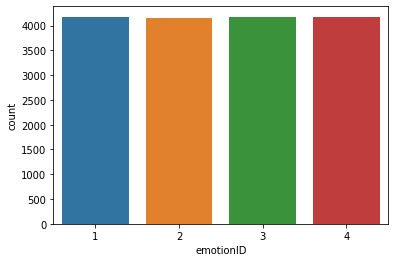

In [ ]:
sns.countplot(Data_final['emotionID'])
plt.show()

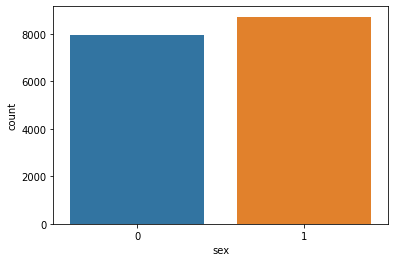

In [ ]:
sns.countplot(Data_final['sex'])
plt.show()

In [ ]:
Data_final.groupby('sex').mean().drop(['voice_id','textID','emotionID', 'Unnamed: 0'],axis=1)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,chroma_cqt,chroma_cens,melspectrogram,spectral_contrast,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
sex,,,,,,,,,,,,,,,,,,,,,
0,0.379812,0.037791,2048.099873,1983.467325,3953.680622,0.115588,0.449009,0.253657,0.972147,20.484372,...,-7.273144,-4.714970,-5.467193,-2.843025,-4.907720,-6.216274,-3.370408,-2.815081,-4.200561,-1.411562
1,0.416790,0.042655,1827.617335,1895.713392,3604.740078,0.100578,0.475184,0.257276,1.233964,20.187601,...,-3.313492,-2.299196,-3.642180,-4.075713,-1.464984,-2.492571,-5.269522,-3.088241,-3.806568,-2.826560


In [ ]:
Data_final.groupby('emotionID').mean().drop(['voice_id','textID','sex','Unnamed: 0'],axis=1)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,chroma_cqt,chroma_cens,melspectrogram,spectral_contrast,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
emotionID,,,,,,,,,,,,,,,,,,,,,
1,0.401885,0.052419,2005.604561,1957.173461,3896.063072,0.115086,0.475536,0.260683,1.682282,20.420591,...,-5.515068,-3.472963,-4.603627,-3.674741,-3.452990,-4.402119,-4.413822,-3.154457,-3.831771,-2.231460
2,0.374433,0.050784,1885.647635,1883.473127,3627.533861,0.104873,0.443748,0.256226,1.512039,20.955420,...,-6.460282,-4.356835,-5.150642,-3.748600,-3.508825,-4.594420,-4.594992,-2.857151,-3.886104,-2.095072
3,0.409454,0.028341,1925.302546,1969.318983,3799.925512,0.105388,0.467708,0.251865,0.625252,19.942039,...,-4.584505,-3.115534,-4.172438,-3.266273,-2.765654,-3.823179,-4.053940,-3.003743,-3.918139,-1.991807
4,0.410658,0.029924,1914.361855,1939.904598,3760.312067,0.105599,0.463701,0.253449,0.622043,20.003886,...,-4.258700,-2.867129,-4.128868,-3.264531,-2.704196,-4.257051,-4.394742,-2.816331,-4.340508,-2.288548


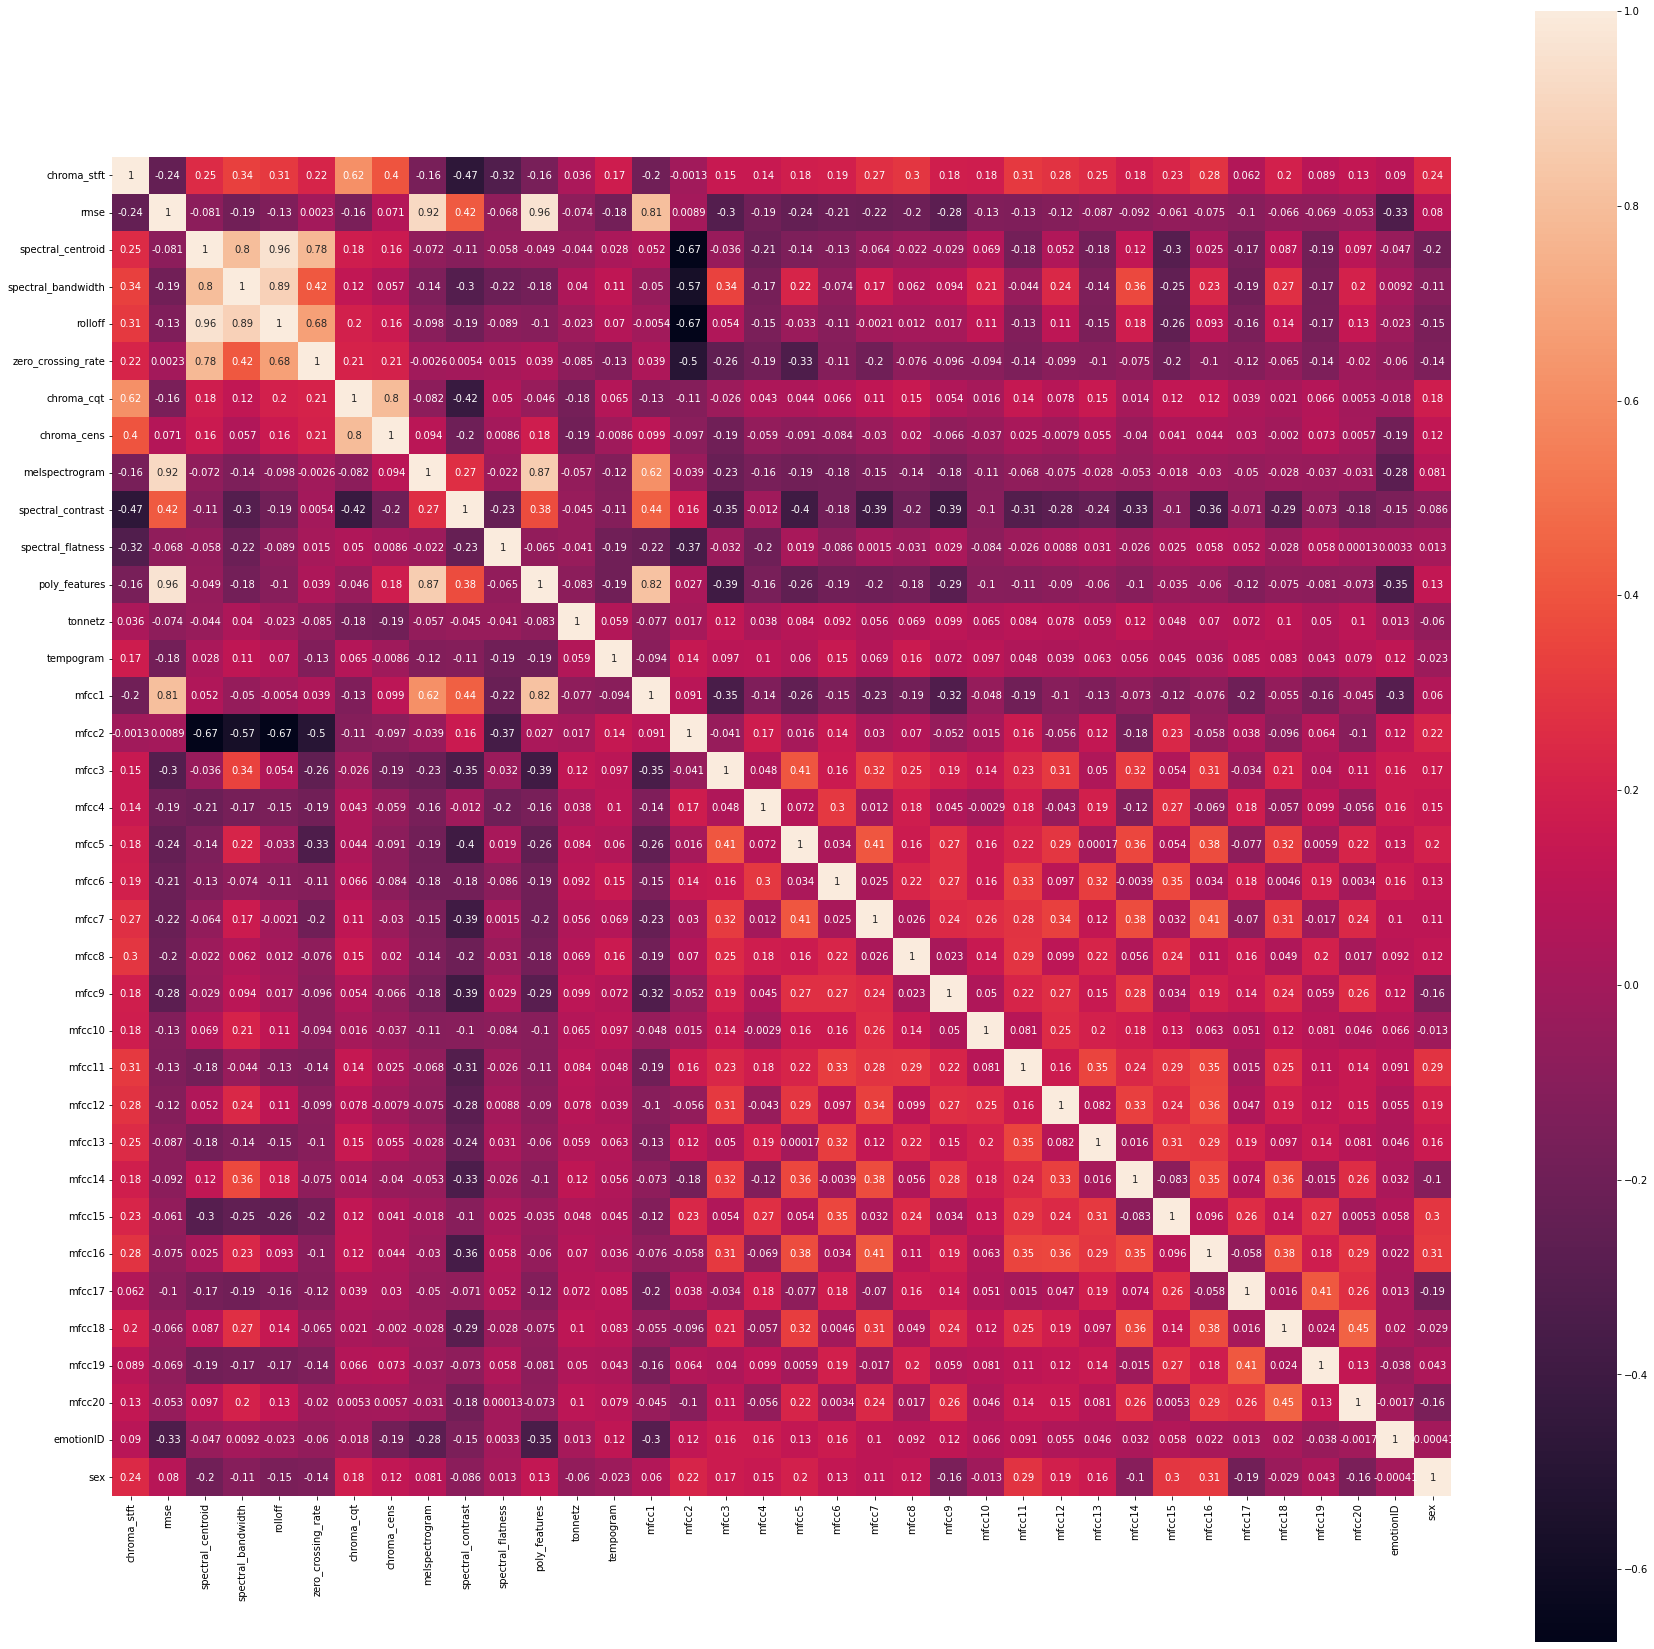

In [ ]:
corr = Data_final.drop(['voice_id','textID','age','Unnamed: 0'],axis=1).corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr , square = True , annot = True)
plt.show()

# طبقه بندی داده ها / 1- طبقه بندی جنسیت

# انتخاب دسته ویژگی های اول

In [141]:
Data_final = pd.read_csv("/content/drive/MyDrive/DataSets\Data_final2.csv")

In [142]:
dataset = Data_final.drop(['voice_id' , 'emotionID','textID','age','Unnamed: 0'],axis=1)

In [143]:
dataset1 = dataset[['chroma_stft','rmse','zero_crossing_rate','poly_features','sex' ,'chroma_cqt','chroma_cens']]
dataset1

,chroma_stft,rmse,zero_crossing_rate,poly_features,sex,chroma_cqt,chroma_cens
0,0.407195,0.048227,0.097052,0.444875,0,0.405252,0.243492
1,0.372574,0.030952,0.092654,0.238027,0,0.416199,0.262689
2,0.396723,0.013850,0.091519,0.102093,0,0.339988,0.228367
3,0.327613,0.019407,0.093968,0.158742,0,0.347896,0.219481
4,0.289442,0.092171,0.154567,0.663516,0,0.326735,0.237134
...,...,...,...,...,...,...,...
16659,0.386891,0.084560,0.074675,0.791939,0,0.422648,0.246199
16660,0.430422,0.048875,0.078739,0.501484,0,0.438642,0.258526
16661,0.374754,0.077368,0.108536,0.658256,0,0.414151,0.240319
16662,0.516253,0.057034,0.074102,0.541927,0,0.378491,0.243557


In [144]:
X=dataset1.drop(['sex'],axis=1)
y=dataset1['sex']

In [ ]:
Sc = StandardScaler()
X=Sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state= 42 , shuffle=True)

# اعمال مدل ها روی دسته ویژگی های اول

# مدل اول = MLP

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128 , validation_split = 0.2)

Epoch 1/20
73/73 [==============================] - 1s 8ms/step - loss: 0.6096 - accuracy: 0.6728 - val_loss: 0.5798 - val_accuracy: 0.6982
Epoch 2/20
73/73 [==============================] - 0s 5ms/step - loss: 0.5822 - accuracy: 0.6954 - val_loss: 0.5704 - val_accuracy: 0.6987
Epoch 3/20
73/73 [==============================] - 0s 6ms/step - loss: 0.5675 - accuracy: 0.7068 - val_loss: 0.5479 - val_accuracy: 0.7102
Epoch 4/20
73/73 [==============================] - 0s 5ms/step - loss: 0.5548 - accuracy: 0.7186 - val_loss: 0.5482 - val_accuracy: 0.7115
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.5520 - accuracy: 0.7157 - val_loss: 0.5398 - val_accuracy: 0.7184
Epoch 6/20
73/73 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.7247 - val_loss: 0.5416 - val_accuracy: 0.7222
Epoch 7/20
73/73 [==============================] - 0s 5ms/step - loss: 0.5445 - accuracy: 0.7221 - val_loss: 0.5421 - val_accuracy: 0.7184
Epoch 8/20
73/73 [==

In [ ]:
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test accuracy:', results)

test loss, test accuracy: [0.5311521887779236, 0.7401999831199646]


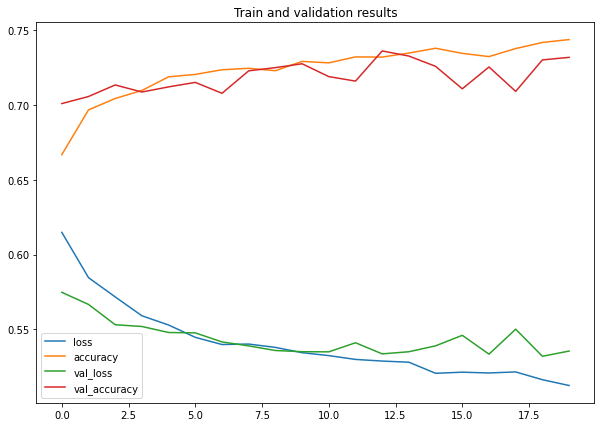

In [ ]:
pd.DataFrame(classifier.history).plot(title="Train and validation results",figsize=(10,7))

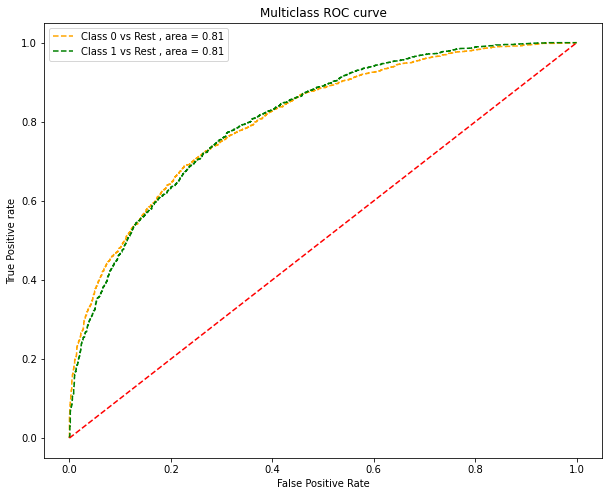

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[: ,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# مدل دوم = SVM

In [ ]:
classifier = SVC(kernel='rbf',C=150)
classifier.fit(X_train,y_train)
y_pred_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test_accuracy     : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 76.8004%
Test_accuracy     : 73.5200%
f1_score          : 73.398%
jaccard_score     : 58.008%


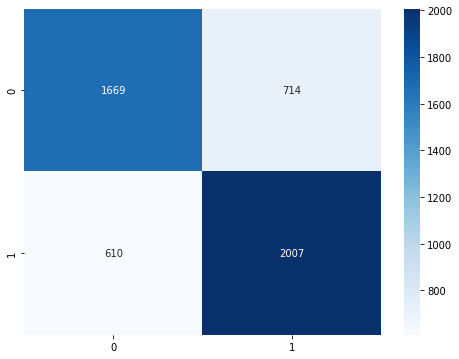

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

# مدل سوم = RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=1000 , random_state=42 )
clf.fit(X_train,y_train)
y_pred_test=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,clf.predict(X_train))*100))
print("Test_accuracy    : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 100.0000%
Test_accuracy    : 73.1000%
f1_score          : 72.959%
jaccard_score     : 57.467%


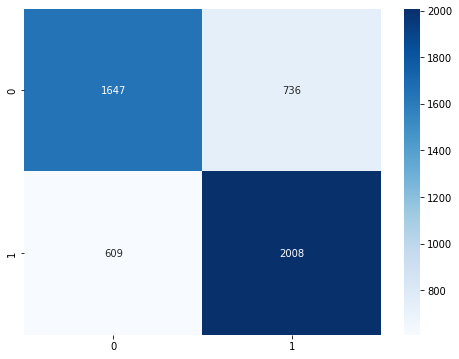

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

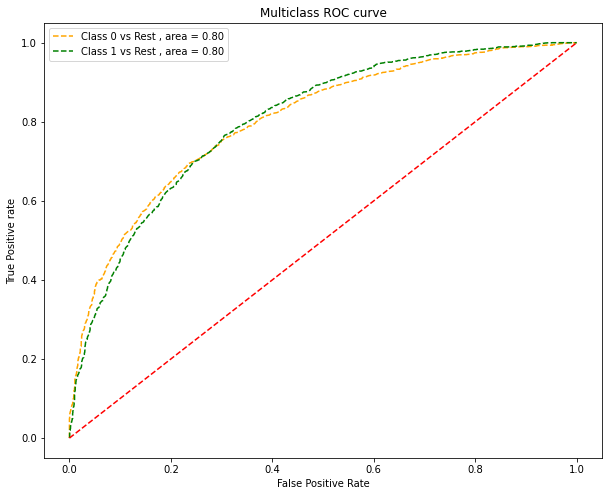

In [ ]:
y_pred_prob=clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

# انتخاب دسته ویژگی های دوم

In [7]:
Data_final = pd.read_csv("/content/drive/MyDrive/DataSets\Data_final2.csv")

In [8]:
dataset = Data_final.drop(['voice_id' , 'emotionID','textID','age','Unnamed: 0'],axis=1)

In [9]:
dataset2 = dataset.drop(['chroma_stft','rmse','zero_crossing_rate','poly_features' ,'chroma_cqt','chroma_cens','tempogram','tonnetz'],axis=1)
dataset2

,spectral_centroid,spectral_bandwidth,rolloff,melspectrogram,spectral_contrast,spectral_flatness,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,sex
0,2070.117934,2235.978511,4056.818972,0.971730,21.398750,0.023069,-336.662201,99.368729,-0.322146,-0.461280,...,-15.250732,-1.424494,2.783118,-2.356746,-2.504868,-6.397053,-2.271737,-6.038849,2.307027,0
1,2035.473598,2105.395420,3961.978075,0.413218,21.504865,0.014485,-417.724609,101.465805,24.462284,8.315823,...,-4.797619,-12.757881,-0.092873,3.225427,-3.593542,-0.112227,-2.448969,1.081102,2.982710,0
2,2302.454308,2401.883596,4745.061271,0.123983,19.687023,0.024776,-485.174652,86.329292,25.265568,16.838478,...,2.213439,-3.381242,7.795971,0.320674,0.389995,-2.094615,4.497597,-3.786969,-0.991609,0
3,1867.121123,2006.126588,3371.484375,0.142523,21.764630,0.014930,-442.173676,119.323441,12.196169,-5.961163,...,-4.838505,-10.580754,-1.082697,0.066405,-8.977236,-4.589973,2.556240,-11.811107,0.796560,0
4,2504.532543,1934.266426,3640.933368,2.484981,23.033272,0.012563,-290.744873,102.824020,10.513094,-24.577358,...,-6.066375,-4.731117,-0.813028,-4.293788,-3.371527,-2.857820,-1.253108,-4.223165,7.088153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,2272.658876,2612.279871,5136.615460,3.351294,19.688842,0.015888,-254.435379,88.571175,12.887927,26.315659,...,5.087998,1.316096,7.020123,-2.614000,-0.416007,-6.005363,7.160671,-4.315312,3.270334,0
16660,2206.421625,2439.838558,4751.570435,1.286419,19.971029,0.016508,-357.782227,92.558861,-11.696466,10.169211,...,4.807886,-1.939340,7.666349,-8.393369,-2.534504,-4.853053,9.299892,2.404159,8.027781,0
16661,2407.139777,2452.604153,4796.014874,2.329914,20.907663,0.031154,-296.014099,81.470718,-15.767801,16.195210,...,-1.922306,3.377460,10.502124,-12.900036,2.276318,-7.502810,2.505652,-6.434907,2.276981,0
16662,2534.227274,2675.490906,5514.208984,1.919204,18.345353,0.023280,-308.623840,79.916222,1.296385,23.909767,...,-1.168440,0.195538,7.767798,-2.199192,4.392592,-5.120759,6.432992,-5.844689,3.610469,0


In [ ]:
X=dataset2.drop(['sex'],axis=1)
y=dataset2['sex']

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spectral_centroid   16664 non-null  float64
 1   spectral_bandwidth  16664 non-null  float64
 2   rolloff             16664 non-null  float64
 3   melspectrogram      16664 non-null  float64
 4   spectral_contrast   16664 non-null  float64
 5   spectral_flatness   16664 non-null  float64
 6   mfcc1               16664 non-null  float64
 7   mfcc2               16664 non-null  float64
 8   mfcc3               16664 non-null  float64
 9   mfcc4               16664 non-null  float64
 10  mfcc5               16664 non-null  float64
 11  mfcc6               16664 non-null  float64
 12  mfcc7               16664 non-null  float64
 13  mfcc8               16664 non-null  float64
 14  mfcc9               16664 non-null  float64
 15  mfcc10              16664 non-null  float64
 16  mfcc

In [ ]:
Sc = StandardScaler()
X=Sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state= 42 , shuffle=True)

# اعمال مدل ها روی دسته ویژگی های دوم

# مدل اول = MLP

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128 , validation_split = 0.2)

Epoch 1/20
73/73 [==============================] - 1s 7ms/step - loss: 0.4416 - accuracy: 0.7950 - val_loss: 0.3282 - val_accuracy: 0.8586
Epoch 2/20
73/73 [==============================] - 0s 5ms/step - loss: 0.3188 - accuracy: 0.8627 - val_loss: 0.2800 - val_accuracy: 0.8783
Epoch 3/20
73/73 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.8953 - val_loss: 0.2427 - val_accuracy: 0.8984
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2072 - accuracy: 0.9178 - val_loss: 0.2014 - val_accuracy: 0.9203
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.1684 - accuracy: 0.9366 - val_loss: 0.2045 - val_accuracy: 0.9211
Epoch 6/20
73/73 [==============================] - 0s 5ms/step - loss: 0.1405 - accuracy: 0.9463 - val_loss: 0.1669 - val_accuracy: 0.9340
Epoch 7/20
73/73 [==============================] - 0s 5ms/step - loss: 0.1142 - accuracy: 0.9569 - val_loss: 0.1678 - val_accuracy: 0.9417
Epoch 8/20
73/73 [==

In [ ]:
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test accuracy:', results)

test loss, test accuracy: [0.17778711020946503, 0.9491999745368958]


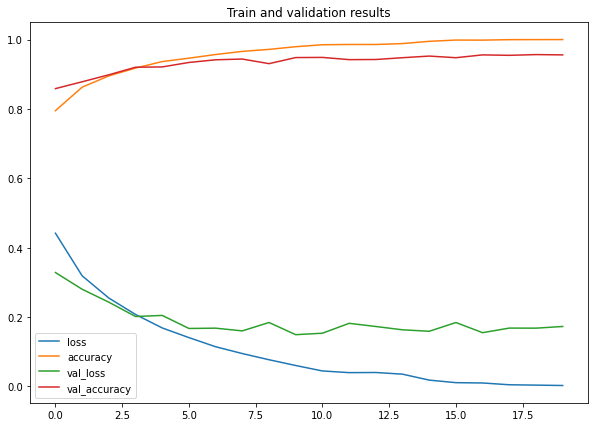

In [ ]:
pd.DataFrame(classifier.history).plot(title="Train and validation results",figsize=(10,7))

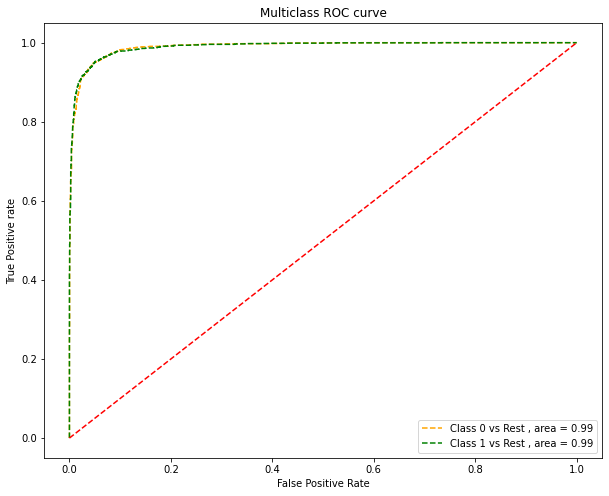

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[: ,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# مدل دوم = SVM

In [ ]:
classifier = SVC(kernel='rbf',C=150)
classifier.fit(X_train,y_train)
y_pred_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test_accuracy     : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 99.9914%
Test_accuracy     : 95.4400%
f1_score          : 95.430%
jaccard_score     : 91.261%


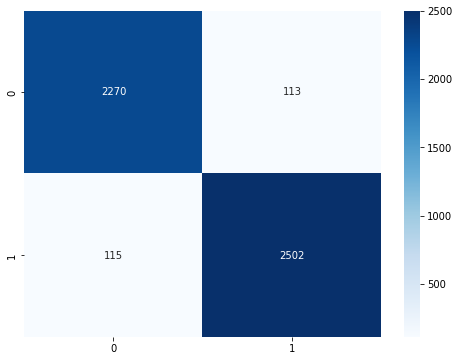

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

# مدل سوم = RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=1000 , random_state=42 )
clf.fit(X_train,y_train)
y_pred_test=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,clf.predict(X_train))*100))
print("Test_accuracy    : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 100.0000%
Test_accuracy    : 91.6600%
f1_score          : 91.646%
jaccard_score     : 84.582%


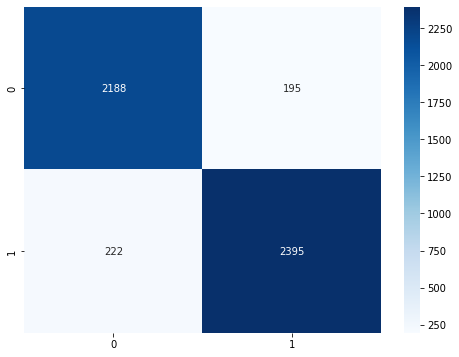

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

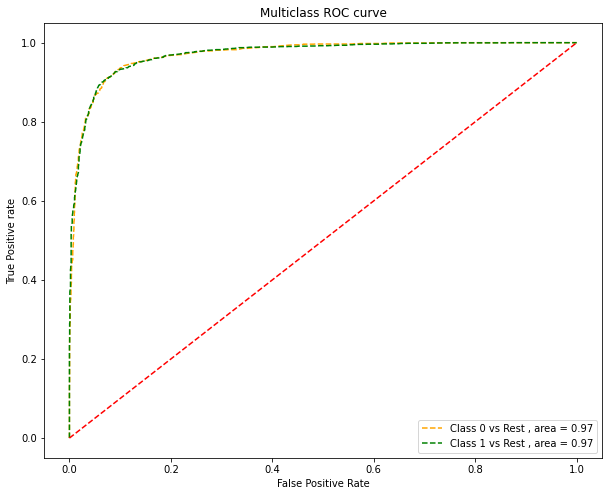

In [ ]:
y_pred_prob=clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

# طبقه بندی داده ها / 2- طبقه بندی احساس

# انتخاب دسته ویژگی های اول

In [1]:
Data_final = pd.read_csv("/content/drive/MyDrive/DataSets\Data_final2.csv")
dataset = Data_final.drop(['voice_id' , 'sex','textID','age','Unnamed: 0'],axis=1)

NameError: ignored

In [ ]:
dataset1 = dataset[['chroma_stft','rmse','zero_crossing_rate','poly_features','emotionID' ,'chroma_cqt','chroma_cens']]
dataset1

,chroma_stft,rmse,zero_crossing_rate,poly_features,emotionID,chroma_cqt,chroma_cens
0,0.407195,0.048227,0.097052,0.444875,1,0.405252,0.243492
1,0.372574,0.030952,0.092654,0.238027,2,0.416199,0.262689
2,0.396723,0.013850,0.091519,0.102093,3,0.339988,0.228367
3,0.327613,0.019407,0.093968,0.158742,4,0.347896,0.219481
4,0.289442,0.092171,0.154567,0.663516,1,0.326735,0.237134
...,...,...,...,...,...,...,...
16659,0.386891,0.084560,0.074675,0.791939,4,0.422648,0.246199
16660,0.430422,0.048875,0.078739,0.501484,1,0.438642,0.258526
16661,0.374754,0.077368,0.108536,0.658256,2,0.414151,0.240319
16662,0.516253,0.057034,0.074102,0.541927,3,0.378491,0.243557


In [ ]:
LE=LabelEncoder()
dataset1['emotionID']=LE.fit_transform(dataset1['emotionID'])    

In [ ]:
X=dataset1.drop(['emotionID'],axis=1)
y=dataset1['emotionID']

In [ ]:
Sc = StandardScaler()
X=Sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state= 42 , shuffle=True)

# اعمال مدل ها روی دسته ویژگی های اول

# مدل اول = MLP

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128, validation_split = 0.2)

Epoch 1/20
73/73 [==============================] - 1s 10ms/step - loss: 1.2604 - accuracy: 0.4020 - val_loss: 1.2291 - val_accuracy: 0.4226
Epoch 2/20
73/73 [==============================] - 1s 7ms/step - loss: 1.2288 - accuracy: 0.4228 - val_loss: 1.2170 - val_accuracy: 0.4359
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: 1.2201 - accuracy: 0.4304 - val_loss: 1.2224 - val_accuracy: 0.4295
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 1.2169 - accuracy: 0.4269 - val_loss: 1.2161 - val_accuracy: 0.4278
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 1.2099 - accuracy: 0.4349 - val_loss: 1.2129 - val_accuracy: 0.4359
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 1.2045 - accuracy: 0.4390 - val_loss: 1.2192 - val_accuracy: 0.4273
Epoch 7/20
73/73 [==============================] - 1s 8ms/step - loss: 1.2033 - accuracy: 0.4410 - val_loss: 1.2174 - val_accuracy: 0.4291
Epoch 8/20
73/73 [=

In [ ]:
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test accuracy:', results)

test loss, test accuracy: [1.2038077116012573, 0.4390000104904175]


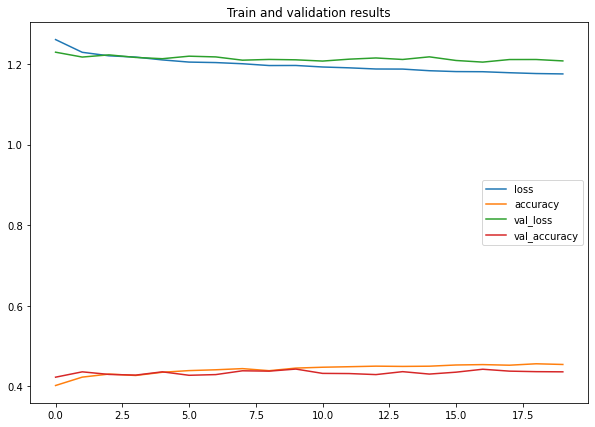

In [ ]:
pd.DataFrame(classifier.history).plot(title="Train and validation results",figsize=(10,7))

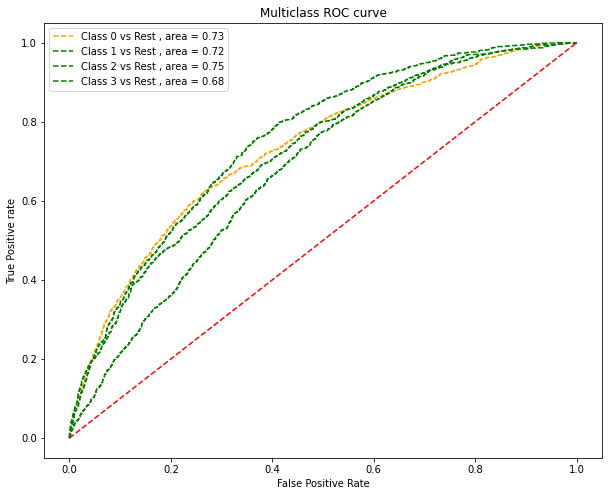

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[: ,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='green',label="Class 2 vs Rest , area = %0.2f" % roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='--',color='green',label="Class 3 vs Rest , area = %0.2f" % roc_auc[3])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# مدل دوم = SVM

In [ ]:
classifier = SVC(kernel='rbf',C=3.8 , gamma=0.1)
classifier.fit(X_train,y_train)
y_pred_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test_accuracy     : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 45.7562%
Test_accuracy     : 44.4600%
f1_score          : 44.381%
jaccard_score     : 28.622%


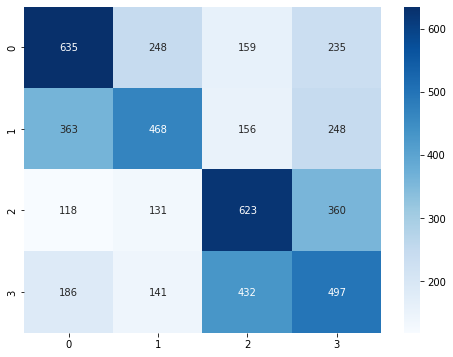

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

# مدل سوم = RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=2000 , random_state=42 , max_depth=50 )
clf.fit(X_train,y_train)
y_pred_test=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,clf.predict(X_train))*100))
print("Test_accuracy    : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 99.9228%
Test_accuracy    : 42.9000%
f1_score          : 42.847%
jaccard_score     : 27.316%


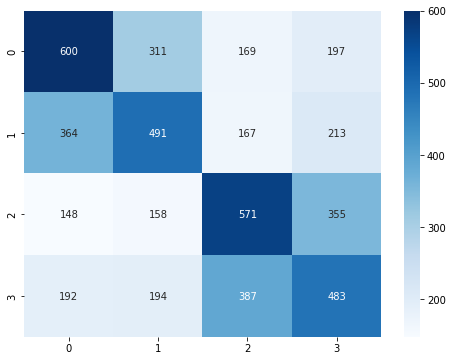

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

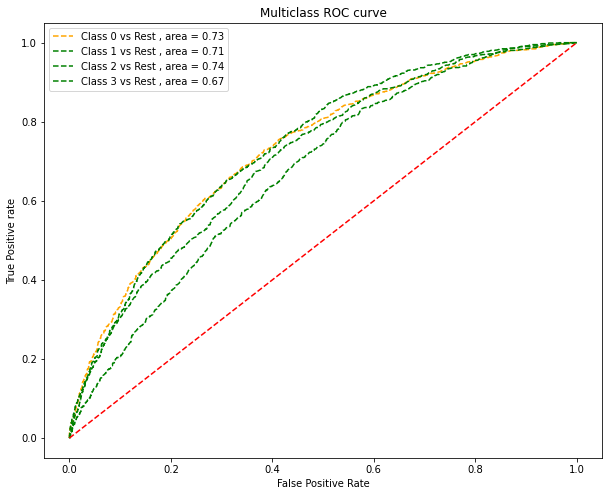

In [ ]:
y_pred_prob=clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='green',label="Class 2 vs Rest , area = %0.2f" % roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='--',color='green',label="Class 3 vs Rest , area = %0.2f" % roc_auc[3])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

# انتخاب دسته ویژگی های دوم

In [ ]:
Data_final = pd.read_csv("/content/drive/MyDrive/DataSets\Data_final2.csv")
dataset = Data_final.drop(['voice_id' , 'sex','textID','age','Unnamed: 0'],axis=1)

In [ ]:
dataset2 = dataset.drop(['chroma_stft','rmse','zero_crossing_rate','poly_features' ,'chroma_cqt','chroma_cens','tempogram','tonnetz'],axis=1)
dataset2

,spectral_centroid,spectral_bandwidth,rolloff,melspectrogram,spectral_contrast,spectral_flatness,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotionID
0,2070.117934,2235.978511,4056.818972,0.971730,21.398750,0.023069,-336.662201,99.368729,-0.322146,-0.461280,...,-15.250732,-1.424494,2.783118,-2.356746,-2.504868,-6.397053,-2.271737,-6.038849,2.307027,1
1,2035.473598,2105.395420,3961.978075,0.413218,21.504865,0.014485,-417.724609,101.465805,24.462284,8.315823,...,-4.797619,-12.757881,-0.092873,3.225427,-3.593542,-0.112227,-2.448969,1.081102,2.982710,2
2,2302.454308,2401.883596,4745.061271,0.123983,19.687023,0.024776,-485.174652,86.329292,25.265568,16.838478,...,2.213439,-3.381242,7.795971,0.320674,0.389995,-2.094615,4.497597,-3.786969,-0.991609,3
3,1867.121123,2006.126588,3371.484375,0.142523,21.764630,0.014930,-442.173676,119.323441,12.196169,-5.961163,...,-4.838505,-10.580754,-1.082697,0.066405,-8.977236,-4.589973,2.556240,-11.811107,0.796560,4
4,2504.532543,1934.266426,3640.933368,2.484981,23.033272,0.012563,-290.744873,102.824020,10.513094,-24.577358,...,-6.066375,-4.731117,-0.813028,-4.293788,-3.371527,-2.857820,-1.253108,-4.223165,7.088153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,2272.658876,2612.279871,5136.615460,3.351294,19.688842,0.015888,-254.435379,88.571175,12.887927,26.315659,...,5.087998,1.316096,7.020123,-2.614000,-0.416007,-6.005363,7.160671,-4.315312,3.270334,4
16660,2206.421625,2439.838558,4751.570435,1.286419,19.971029,0.016508,-357.782227,92.558861,-11.696466,10.169211,...,4.807886,-1.939340,7.666349,-8.393369,-2.534504,-4.853053,9.299892,2.404159,8.027781,1
16661,2407.139777,2452.604153,4796.014874,2.329914,20.907663,0.031154,-296.014099,81.470718,-15.767801,16.195210,...,-1.922306,3.377460,10.502124,-12.900036,2.276318,-7.502810,2.505652,-6.434907,2.276981,2
16662,2534.227274,2675.490906,5514.208984,1.919204,18.345353,0.023280,-308.623840,79.916222,1.296385,23.909767,...,-1.168440,0.195538,7.767798,-2.199192,4.392592,-5.120759,6.432992,-5.844689,3.610469,3


In [ ]:
X=dataset2.drop(['emotionID'],axis=1)
y=dataset2['emotionID']

In [ ]:
LE=LabelEncoder()
dataset2['emotionID']=LE.fit_transform(dataset2['emotionID'])    

In [ ]:
Sc = StandardScaler()
X=Sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state= 42 , shuffle=True)

# اعمال مدل ها روی دسته ویژگی های دوم

# مدل اول = MLP

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128, validation_split = 0.2)

Epoch 1/20
73/73 [==============================] - 1s 7ms/step - loss: 1.2852 - accuracy: 0.3746 - val_loss: 1.2390 - val_accuracy: 0.4093
Epoch 2/20
73/73 [==============================] - 0s 6ms/step - loss: 1.2137 - accuracy: 0.4336 - val_loss: 1.2164 - val_accuracy: 0.4299
Epoch 3/20
73/73 [==============================] - 0s 5ms/step - loss: 1.1697 - accuracy: 0.4633 - val_loss: 1.2057 - val_accuracy: 0.4458
Epoch 4/20
73/73 [==============================] - 0s 5ms/step - loss: 1.1398 - accuracy: 0.4793 - val_loss: 1.1907 - val_accuracy: 0.4398
Epoch 5/20
73/73 [==============================] - 0s 5ms/step - loss: 1.0954 - accuracy: 0.5098 - val_loss: 1.1833 - val_accuracy: 0.4582
Epoch 6/20
73/73 [==============================] - 0s 5ms/step - loss: 1.0635 - accuracy: 0.5324 - val_loss: 1.1788 - val_accuracy: 0.4681
Epoch 7/20
73/73 [==============================] - 0s 5ms/step - loss: 1.0215 - accuracy: 0.5544 - val_loss: 1.1725 - val_accuracy: 0.4586
Epoch 8/20
73/73 [==

In [ ]:
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test accuracy:', results)

test loss, test accuracy: [1.2326005697250366, 0.5266000032424927]


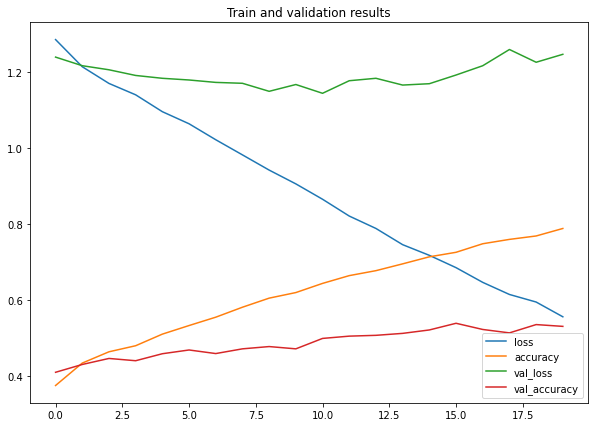

In [ ]:
pd.DataFrame(classifier.history).plot(title="Train and validation results",figsize=(10,7))

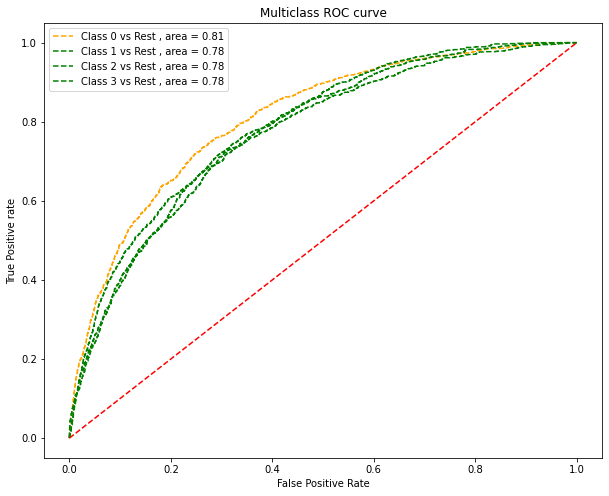

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[: ,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='green',label="Class 2 vs Rest , area = %0.2f" % roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='--',color='green',label="Class 3 vs Rest , area = %0.2f" % roc_auc[3])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

# مدل دوم = SVM

In [ ]:
classifier = SVC(kernel='rbf',C=3.8 , gamma=0.1)
classifier.fit(X_train,y_train)
y_pred_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test_accuracy     : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 96.3820%
Test_accuracy     : 63.3800%
f1_score          : 63.343%
jaccard_score     : 46.429%


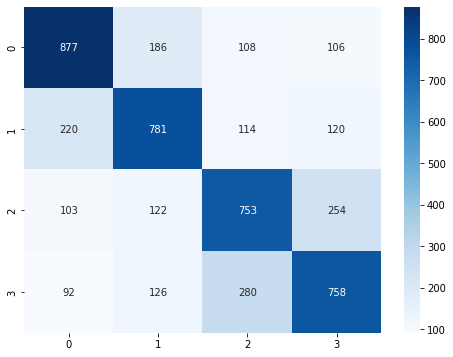

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

# مدل سوم = RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=2000 , random_state=42 , max_depth=50 )
clf.fit(X_train,y_train)
y_pred_test=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
print("Train_accuracy    : {:.4f}%" . format(accuracy_score(y_train,clf.predict(X_train))*100))
print("Test_accuracy    : {:.4f}%" . format(accuracy_score(y_test,y_pred_test)*100))
print("f1_score          : {:.3f}%" . format(metrics.f1_score(y_test,y_pred_test,average='macro')*100))
print("jaccard_score     : {:.3f}%" . format(metrics.jaccard_score(y_test,y_pred_test,average='macro')*100))

Train_accuracy    : 99.9228%
Test_accuracy    : 56.9000%
f1_score          : 56.876%
jaccard_score     : 39.765%


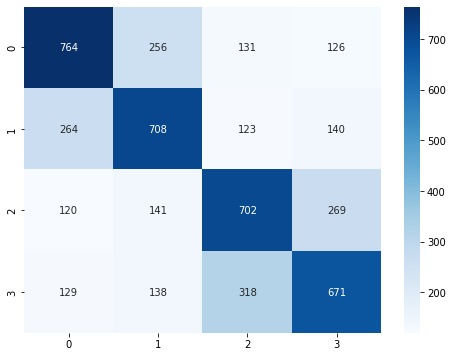

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='', cmap='Blues')
plt.show()

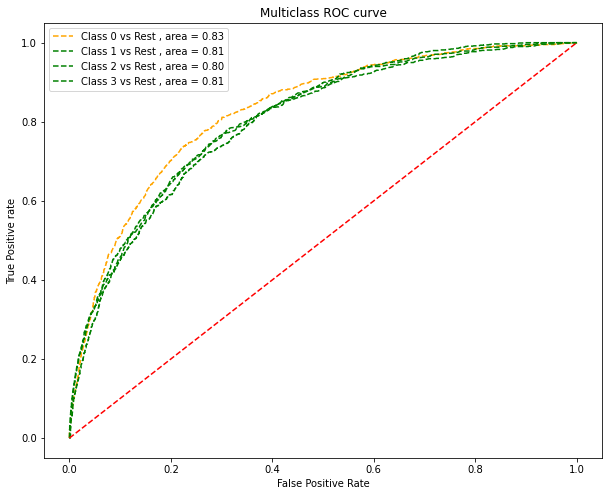

In [ ]:
y_pred_prob=clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
# plotting    
plt.figure(figsize=(10,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label="Class 0 vs Rest , area = %0.2f" % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green',label="Class 1 vs Rest , area = %0.2f" % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='green',label="Class 2 vs Rest , area = %0.2f" % roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='--',color='green',label="Class 3 vs Rest , area = %0.2f" % roc_auc[3])
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

# clustering


In [167]:
y_sex = Data_final['sex']
y_emotionID = Data_final['emotionID']
y_textID = Data_final['textID']

# خوشه بندی روی دسته داده های اول

In [170]:
X1 = dataset1.drop(['sex'],axis=1)
Sc = StandardScaler()
X1=Sc.fit_transform(X1)

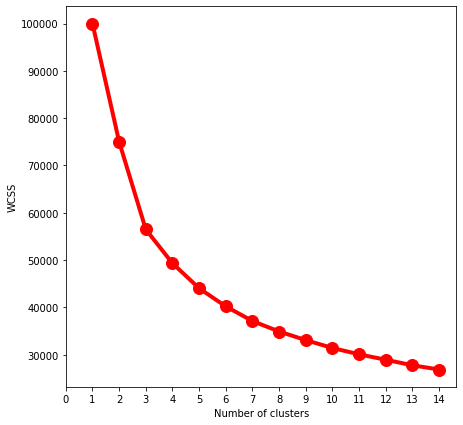

In [12]:
WCSS = []
for i in range(1,15):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X1)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,15),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(15))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# KMeans for 2 cluster

In [171]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X1)

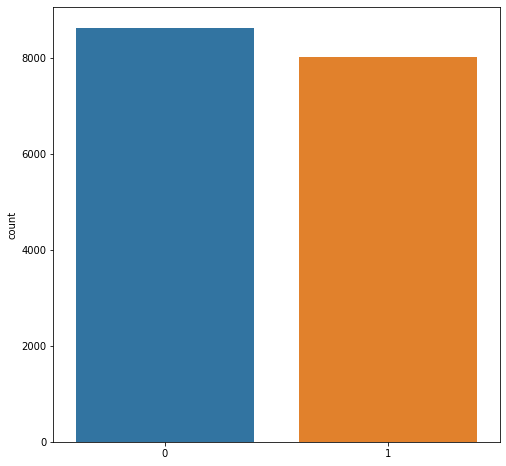

In [172]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [173]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

0.2349702368059524

In [174]:
data={'y_actual_sex':y_sex,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_sex)

y_actual_sex,0,1
y_cluster,,
0,3669,4964
1,4278,3753


# KMeans for 4 cluster

In [175]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X1)

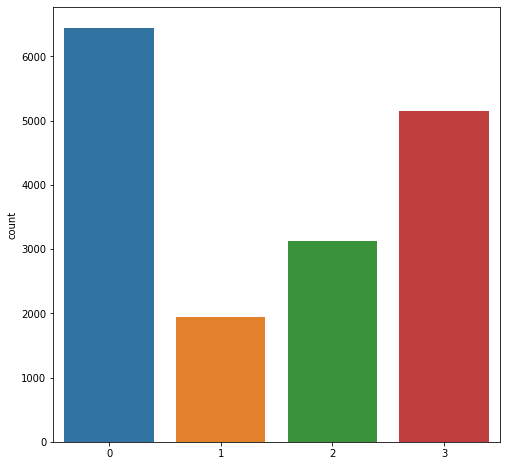

In [176]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [177]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

0.24170465861133994

In [178]:
data={'y_actual_emotionID':y_emotionID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_emotionID)

y_actual_emotionID,1,2,3,4
y_cluster,,,,
0,1439,1265,1858,1885
1,575,350,504,511
2,1366,1165,285,310
3,784,1364,1532,1471


# KMeans for 10 cluster

In [179]:
model = KMeans(n_clusters = 10, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X1)

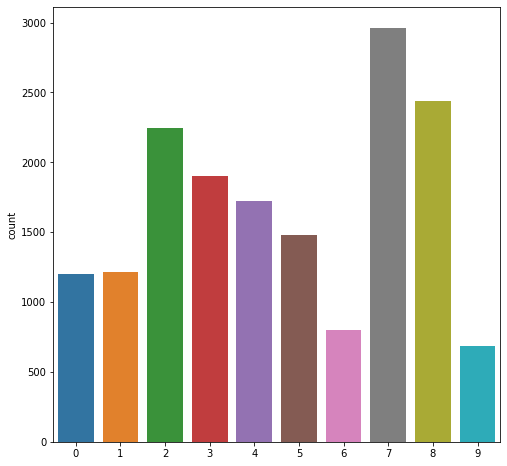

In [180]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [181]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

0.1858674091168136

In [182]:
data={'y_actual_textID':y_textID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_textID)

y_actual_textID,0,1,2,3,4,5,6,7,8,9,10
y_cluster,,,,,,,,,,,
0,0,129,108,149,92,155,248,80,99,65,75
1,0,164,220,108,88,96,76,152,106,103,104
2,5,222,161,185,251,262,234,223,212,255,237
3,3,199,234,197,157,189,148,182,199,190,202
4,4,154,106,233,255,132,263,137,197,134,109
5,0,170,219,121,119,149,74,164,136,145,186
6,0,67,76,30,82,108,62,107,65,87,116
7,3,260,246,336,342,267,275,291,309,343,292
8,1,249,260,258,218,234,149,260,265,287,260


# KMeans for the number of participants 

In [25]:
model = KMeans(n_clusters = 400, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X1)

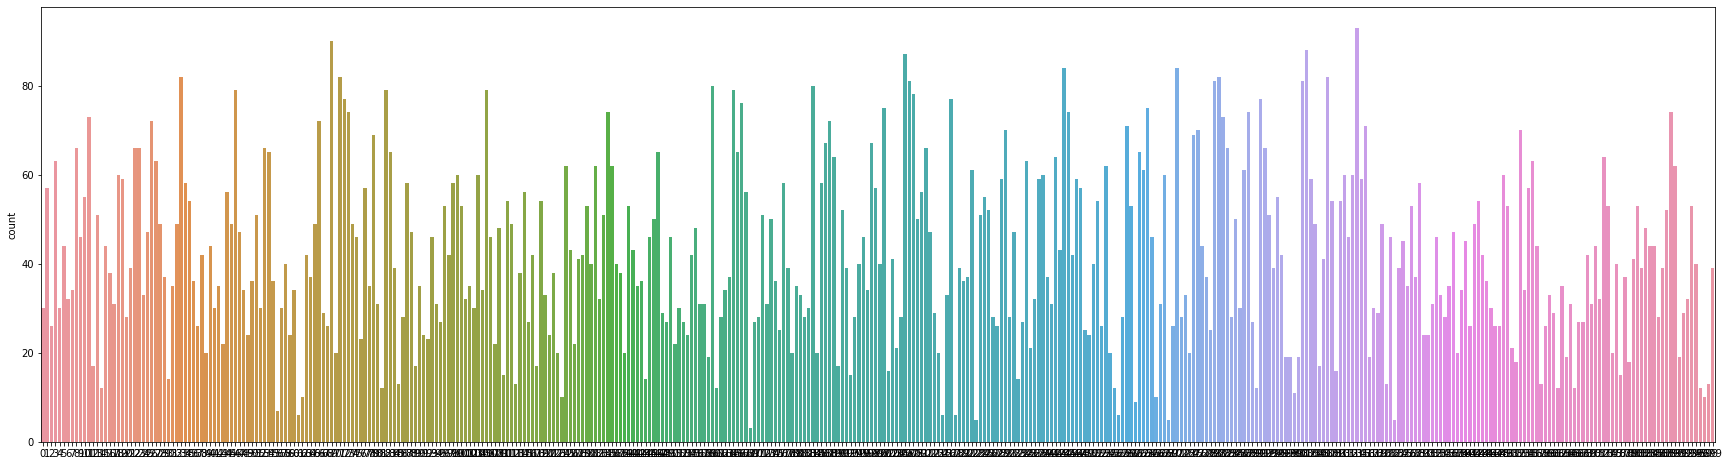

In [30]:
plt.figure(figsize=(30,8))
sns.countplot(y_clusters)
plt.show()

In [31]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

0.14528973950497076

# GMM for 2 cluster

In [183]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X1) 

y_clusters = gmm.predict(X1)

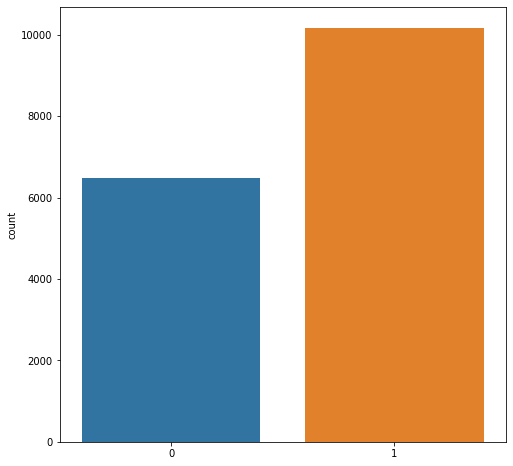

In [184]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [185]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

0.20176181348124786

In [186]:
data={'y_actual_sex':y_sex,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_sex)

y_actual_sex,0,1
y_cluster,,
0,2860,3631
1,5087,5086


# GMM for 4 cluster

In [187]:
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(X1) 

y_clusters = gmm.predict(X1)

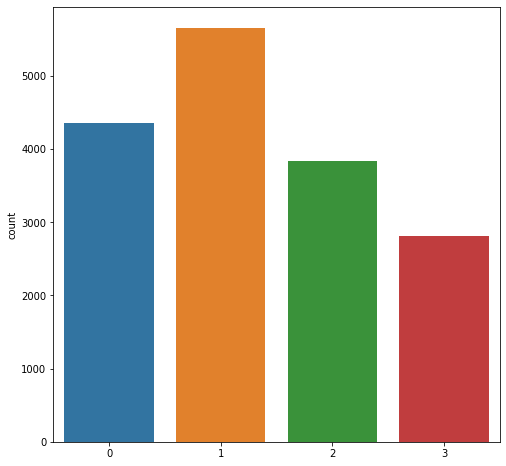

In [188]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [189]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

0.11373820056357054

In [190]:
data={'y_actual_emotionID':y_emotionID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_emotionID)

y_actual_emotionID,1,2,3,4
y_cluster,,,,
0,853,1290,1110,1101
1,828,900,2033,1899
2,1353,942,686,859
3,1130,1012,350,318


# GMM for 10 cluster

In [191]:
gmm = GaussianMixture(n_components=10, covariance_type='full').fit(X1) 

y_clusters = gmm.predict(X1)

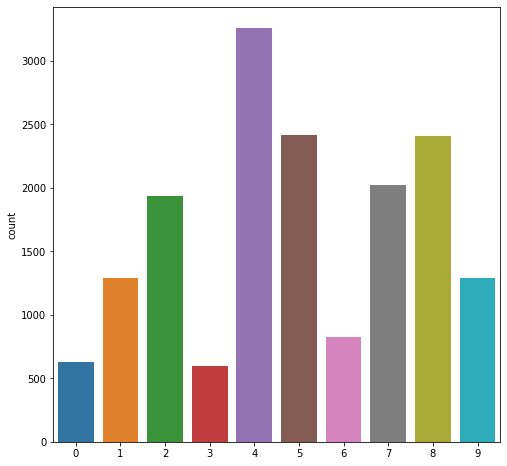

In [192]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [193]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

0.05637521668995065

In [194]:
data={'y_actual_textID':y_textID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_textID)

y_actual_textID,0,1,2,3,4,5,6,7,8,9,10
y_cluster,,,,,,,,,,,
0,0,81,105,63,42,60,46,59,67,41,61
1,1,131,69,170,179,98,227,105,123,106,81
2,0,205,256,150,157,174,80,237,210,212,254
3,0,58,33,79,68,59,116,48,56,37,44
4,5,323,331,368,330,311,328,330,350,312,273
5,3,227,219,267,268,224,213,222,253,265,255
6,0,81,88,45,76,94,72,109,76,68,113
7,1,200,251,188,179,177,96,232,202,246,247
8,6,239,184,215,280,290,258,210,206,292,229


# GMM for the number of participants

In [265]:
gmm = GaussianMixture(n_components=400, covariance_type='full').fit(X1) 

y_clusters = gmm.predict(X1)

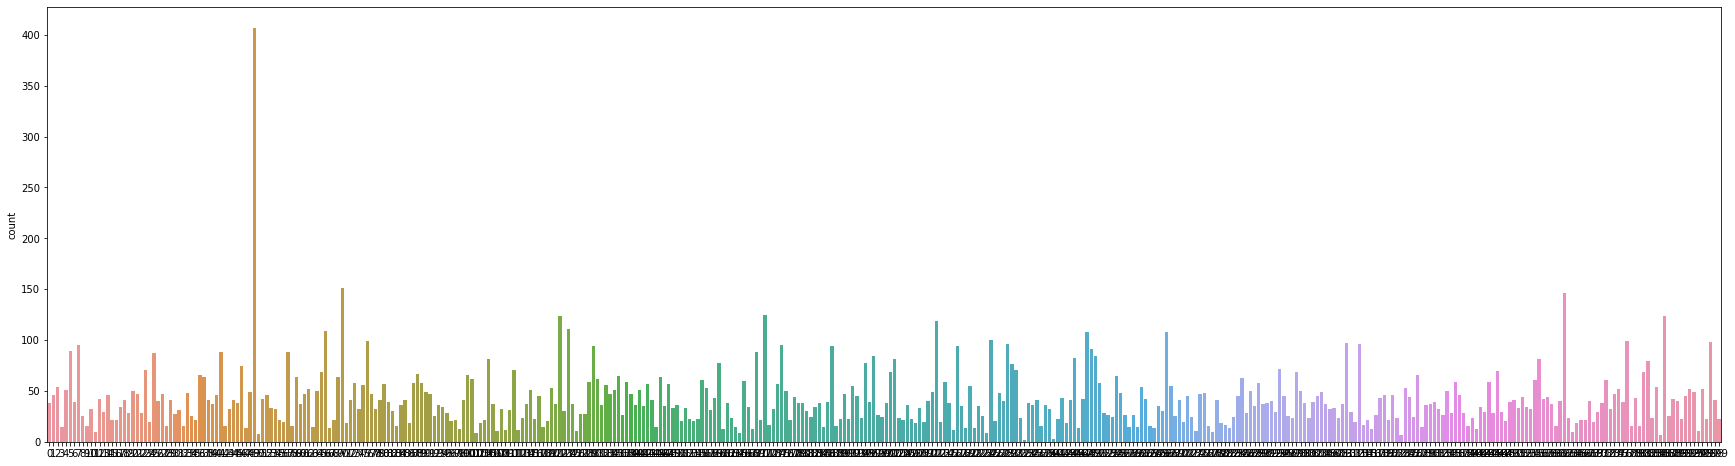

In [122]:
plt.figure(figsize=(30,8))
sns.countplot(y_clusters)
plt.show()

In [266]:
silhouette = silhouette_score (X1,y_clusters)
silhouette

-0.038362534961084334

# خوشه بندی روی دسته داده های دوم

In [201]:
X2 = dataset2.drop(['sex'],axis=1)
Sc = StandardScaler()
X2=Sc.fit_transform(X2)

# KMeans for 2 cluster

In [237]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X2)

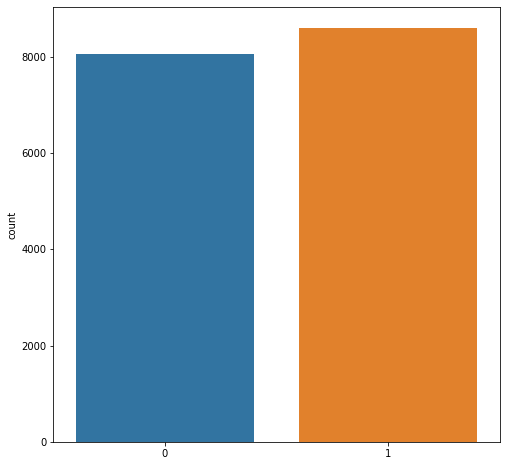

In [238]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [239]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.10781839934972111

In [240]:
data={'y_actual_sex':y_sex,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_sex)

y_actual_sex,0,1
y_cluster,,
0,3549,4513
1,4398,4204


# KMeans for 4 cluster

In [241]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X2)

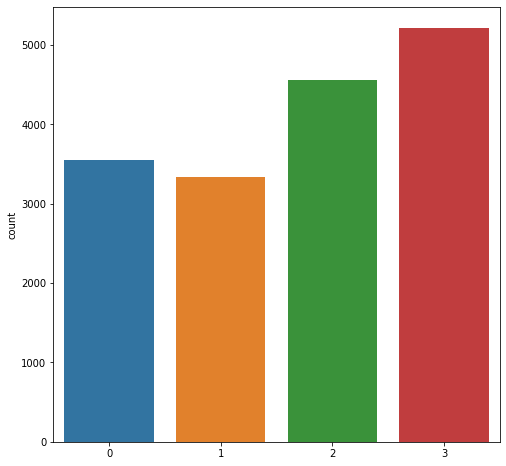

In [242]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [243]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.07514463033931845

In [244]:
data={'y_actual_emotionID':y_emotionID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_emotionID)

y_actual_emotionID,1,2,3,4
y_cluster,,,,
0,827,673,1065,990
1,1138,993,614,593
2,1227,1409,928,989
3,972,1069,1572,1605


# KMeans for 10 cluster

In [245]:
model = KMeans(n_clusters = 10, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X2)

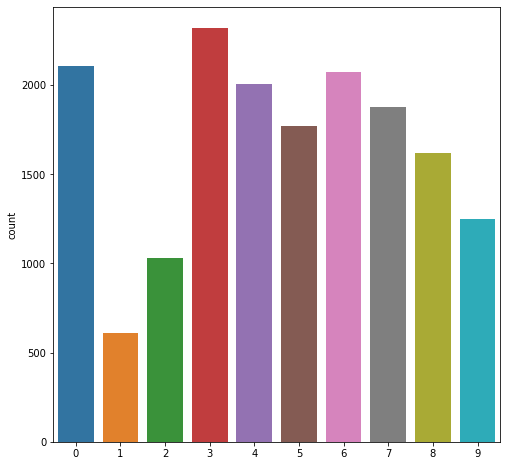

In [246]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [247]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.06152897869811592

In [213]:
data={'y_actual_textID':y_textID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_textID)

y_actual_textID,0,1,2,3,4,5,6,7,8,9,10
y_cluster,,,,,,,,,,,
0,2,208,172,315,210,188,334,170,218,155,134
1,0,58,67,66,58,73,63,57,53,56,57
2,1,97,107,43,101,113,68,150,103,102,148
3,4,204,202,321,240,244,259,219,221,206,202
4,2,213,254,125,203,241,135,224,167,226,214
5,2,194,231,102,137,159,89,181,177,256,242
6,0,214,189,245,249,215,243,197,191,166,164
7,5,197,184,179,200,133,175,184,226,212,183
8,0,190,139,148,160,135,143,163,196,162,184


# KMeans for the number of participants

In [248]:
model = KMeans(n_clusters = 400, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X2)

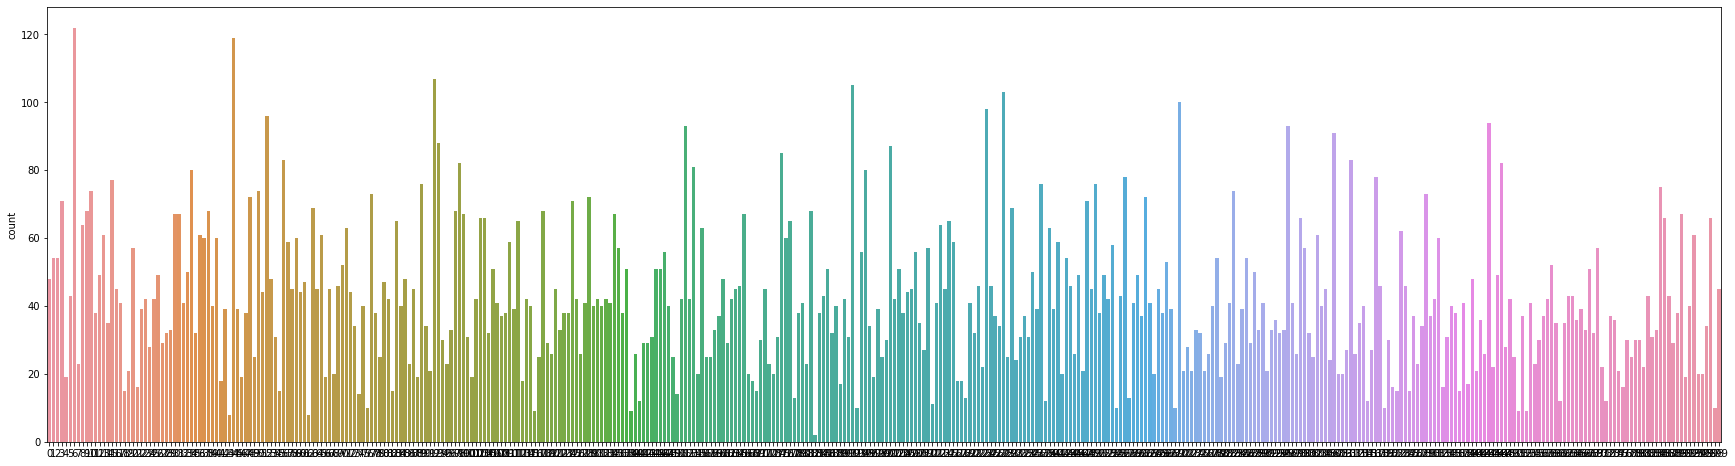

In [249]:
plt.figure(figsize=(30,8))
sns.countplot(y_clusters)
plt.show()

In [250]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.1231195596116675

#GMM for 2 cluster

In [251]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X2) 
y_clusters = gmm.predict(X2)

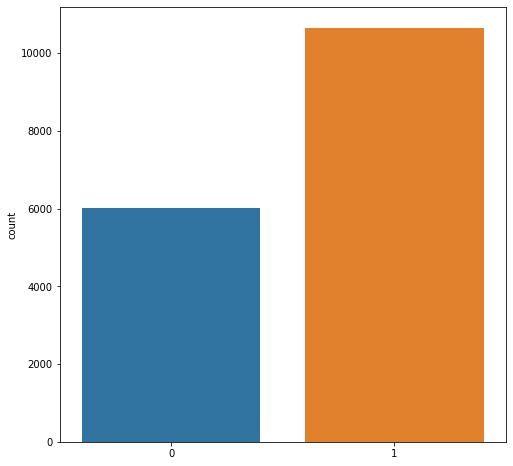

In [252]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [253]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.09620584599600727

In [217]:
data={'y_actual_sex':y_sex,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_sex)

y_actual_sex,0,1
y_cluster,,
0,5278,5375
1,2669,3342


#GMM for 4 cluster

In [254]:
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(X2) 
y_clusters = gmm.predict(X2)

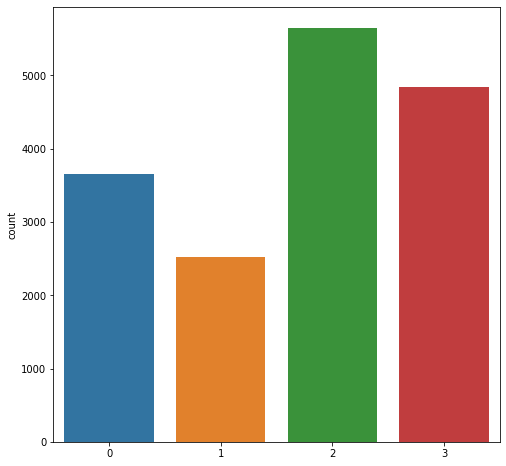

In [255]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [256]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.012251905721506032

In [221]:
data={'y_actual_emotionID':y_emotionID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_emotionID)

y_actual_emotionID,1,2,3,4
y_cluster,,,,
0,1300,1269,585,537
1,1224,1045,1247,1346
2,889,988,1906,1796
3,751,842,441,498


#GMM for 10 cluster

In [263]:
gmm = GaussianMixture(n_components=10, covariance_type='full').fit(X2) 
y_clusters = gmm.predict(X2)

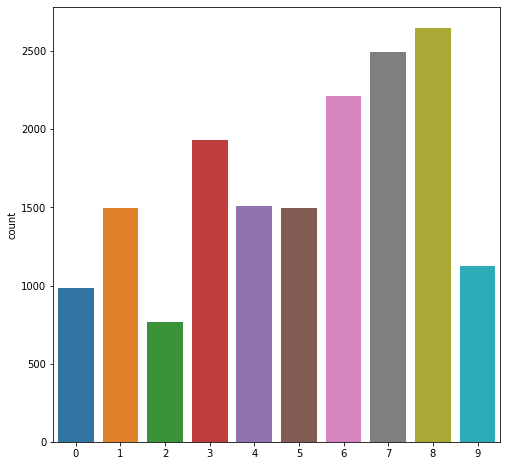

In [264]:
plt.figure(figsize=(8,8))
sns.countplot(y_clusters)
plt.show()

In [259]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.0019084484354461647

In [260]:
data={'y_actual_textID':y_textID,'y_cluster':y_clusters}
data=pd.DataFrame(data)
pd.crosstab(data.y_cluster,data.y_actual_textID)

y_actual_textID,0,1,2,3,4,5,6,7,8,9,10
y_cluster,,,,,,,,,,,
0,0,195,198,203,216,213,182,226,231,208,233
1,0,66,72,79,70,71,76,67,73,71,67
2,1,216,240,173,176,222,200,198,147,203,173
3,2,112,96,128,126,111,155,112,119,107,107
4,8,245,221,255,244,231,234,212,228,241,236
5,0,99,94,113,91,94,111,92,91,97,78
6,3,228,223,256,227,215,242,208,213,219,169
7,1,122,128,92,123,128,97,162,128,122,173
8,1,102,88,107,100,87,93,95,114,91,103


# GMM for the number of participants

In [267]:
gmm = GaussianMixture(n_components=400, covariance_type='full').fit(X2) 
y_clusters = gmm.predict(X2)

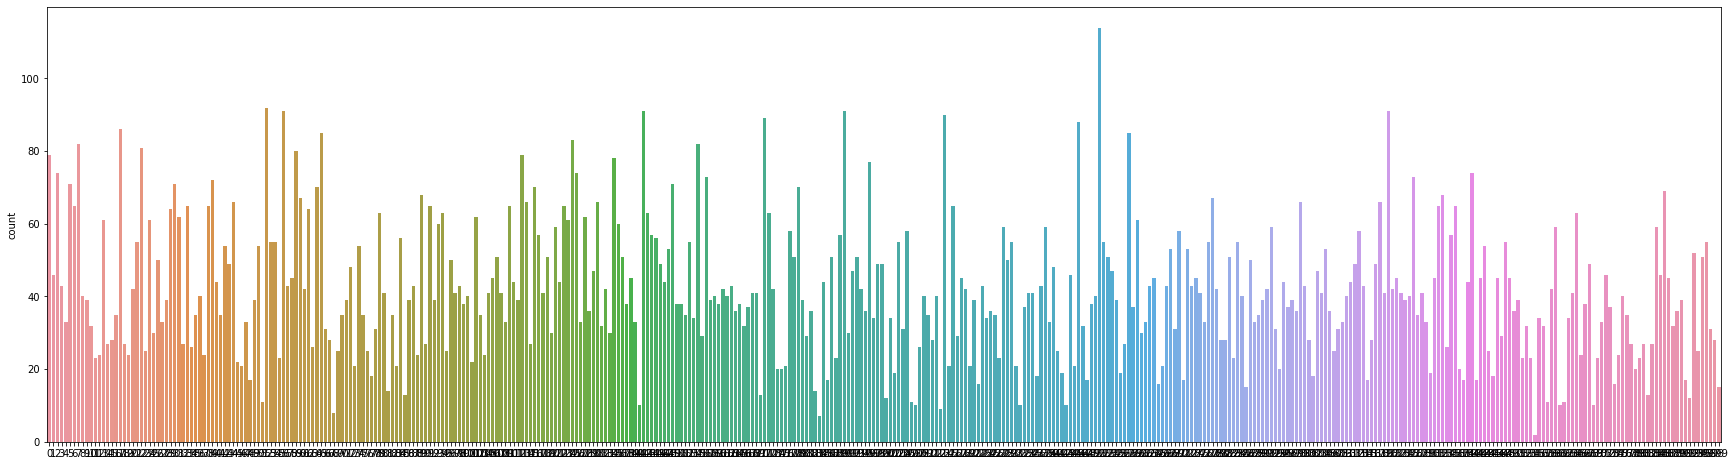

In [136]:
plt.figure(figsize=(30,8))
sns.countplot(y_clusters)
plt.show()

In [268]:
silhouette = silhouette_score (X2,y_clusters)
silhouette

0.11932491431225853